# **Network analysis**

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

### **Step 0 - Data loading, normalization, degree calculation**

according to the paper, a normalization by columns is required (although apparently is not really super necessary)

In [ ]:
data = pd.read_csv('data/io_tables/NOR2017ttl.csv', index_col=0)

In [89]:
n = 45
data = data.iloc[:n, :n] 
data.index = data.index.str.replace("TTL_", "", regex=False)
data

,A01_02,A03,B05_06,B07_08,B09,C10T12,C13T15,C16,C17_18,C19,...,K,L,M,N,O,P,Q,R,S,T
A01_02,323.5,6.8,4.2,0.7,2.7,3223.5,15.8,308.8,68.1,2.4,...,6.2,7.3,24.3,31.4,77.3,12.5,52.1,7.2,5.4,0
A03,3.7,1170.4,2.1,0.4,0.3,3329.8,0.4,1.3,0.3,0.1,...,2.5,0.6,4.0,2.7,6.1,5.0,40.8,1.3,0.2,0
B05_06,54.9,64.2,328.1,62.8,243.3,49.4,1.2,7.4,7.6,2985.6,...,8.5,97.7,73.1,116.5,68.5,22.1,70.0,30.6,13.0,0
B07_08,7.7,5.3,42.2,21.5,189.1,17.0,0.4,7.0,3.9,1.9,...,0.7,5.7,4.8,5.8,16.6,0.8,7.0,8.9,0.6,0
B09,3.1,33.3,4738.4,148.5,3076.7,11.5,0.1,0.6,6.1,1755.1,...,0.1,15.1,19.9,3.9,11.0,0.7,4.4,0.9,0.6,0
C10T12,896.0,2115.6,18.0,4.5,9.8,7155.0,12.0,13.7,4.0,2.4,...,22.5,7.7,37.2,29.5,90.0,49.4,384.9,15.2,1.8,0
C13T15,6.6,34.5,26.9,5.1,11.7,30.4,167.0,9.3,4.5,6.4,...,2.4,15.9,52.8,33.7,41.2,19.9,192.1,147.4,58.4,0
C16,3.8,7.8,8.9,2.1,7.2,15.7,0.8,632.3,40.6,1.1,...,3.1,526.0,17.7,12.0,6.0,6.8,18.9,40.8,15.4,0
C17_18,14.7,23.5,9.0,3.0,9.5,133.9,2.1,13.8,365.9,16.2,...,30.8,53.0,272.1,102.3,81.2,38.2,52.0,53.1,35.7,0
C19,112.0,110.4,118.3,87.8,275.0,85.8,4.3,13.8,10.3,199.0,...,9.3,177.0,67.3,70.2,131.9,42.2,130.3,43.7,22.4,0


calculation of in-degrees:

In [90]:
in_degree = data.sum(axis=0)
in_degree

A01_02     2880.7
A03        6049.6
B05_06     9616.7
B07_08     1038.6
B09        7752.1
C10T12    20898.4
C13T15      618.9
C16        2356.8
C17_18     1896.0
C19        6970.1
C20        4000.1
C21         715.0
C22         934.1
C23        2719.9
C24        7605.0
C25        2935.2
C26        1559.7
C27        1818.0
C28        3568.4
C29         617.4
C30        4405.9
C31T33     3747.9
D          1953.6
E          3675.0
F         43072.5
G         22583.2
H49        5892.3
H50       11966.5
H51        3542.8
H52        6666.5
H53         839.1
I          5562.3
J58T60     4119.9
J61        4546.7
J62_63     5649.8
K          8276.1
L         14843.1
M         12843.0
N          9049.3
O         15928.4
P          3999.5
Q          9926.4
R          3325.5
S          2683.4
T             0.0
dtype: float64

normalization and calculation of out-degrees (these second ones both first and second order)

In [91]:
# Step 1: Normalize each column (sector) by its total input requirement
W = data.div(data.sum(axis=0), axis=1).fillna(0)

In [92]:

# Step 2: Compute first-order degrees
# First-order degree of sector j: sum of W_ij over i (i.e., sum of row j in W)
first_order_degrees = W.sum(axis=1)


# Step 3: Compute second-order degrees
# Second-order degree of sector j: sum over i of W_ij * degree_i
second_order_degrees = W.mul(first_order_degrees, axis=0).sum(axis=0)

# Output results
first_order_degrees.name = 'First-Order Degree'
second_order_degrees.name = 'Second-Order Degree'
in_degree.name = 'In-Degree'

# Combine into a single DataFrame
degrees = pd.concat([first_order_degrees, second_order_degrees, in_degree], axis=1)
degrees

,First-Order Degree,Second-Order Degree,In-Degree
A01_02,0.541181,1.986465,2880.7
A03,0.393148,1.766851,6049.6
B05_06,1.337475,1.662098,9616.7
B07_08,0.356726,1.789667,1038.6
B09,1.455875,1.792990,7752.1
C10T12,1.473437,1.773747,20898.4
C13T15,0.534919,2.580962,618.9
C16,0.487069,1.509556,2356.8
C17_18,0.591096,1.525702,1896.0
C19,0.989108,1.531695,6970.1


### **Step 1 - in-degrees visualization and analysis**

In [93]:
def plot_in_degree_density(in_degrees, mean, std):
    plt.figure(figsize=(6, 4))
    ax = sns.kdeplot(in_degrees, fill=True, color='steelblue', linewidth=1)

    ax.axvline(mean-std, color='red', linestyle='--')
    ax.axvline(mean+std, color='red', linestyle='--')
    ax.axvline(mean, color='black', linestyle='-')

    plt.title('Empirical Density of Weighted In-Degrees')
    plt.xlabel('Weighted In-Degree')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

========================== in-degree statistics ==========================
mean degree value = 6569.986666666668
std degrees = 7506.102227790696
pertentage of degrees within one std away from the mean: 88.88888888888889


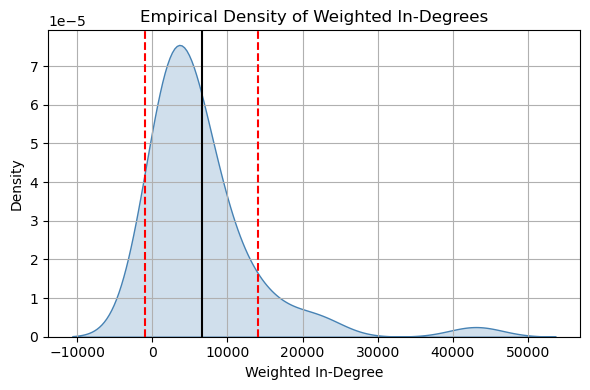

In [94]:
indegree_mean = np.mean(degrees['In-Degree'])
indegree_std = np.std(degrees['In-Degree'])

within_1_std = np.sum((degrees['In-Degree']>=indegree_mean-indegree_std)&(degrees['In-Degree']<=indegree_mean+indegree_std))
percentage_withing_1_std = (within_1_std/len(degrees['In-Degree']))*100

print('========================== in-degree statistics ==========================')
print(f'mean degree value = {indegree_mean}')
print(f'std degrees = {indegree_std}')
print(f'pertentage of degrees within one std away from the mean: {percentage_withing_1_std}')

print('==========================================================================')
plot_in_degree_density(degrees['In-Degree'], indegree_mean, indegree_std)

### **Step 2 - out-degrees (first and second order) visualization and analysis**

In [162]:
def plot_output_degrees_density(first_order_degrees, second_order_degrees):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # First-order degree plot
    sns.kdeplot(first_order_degrees, fill=True, color='orangered', linewidth=0.5, ax=axes[0]) #darkorange
    axes[0].set_title('First-Order Output Degrees')
    axes[0].set_xlabel('Degree Value')
    axes[0].set_ylabel('Density')
    axes[0].grid(True, which="both", ls="--", linewidth=0.4)

    # Second-order degree plot
    sns.kdeplot(second_order_degrees, fill=True, color='royalblue', linewidth=0.5, ax=axes[1]) #forsetgreen
    axes[1].set_title('Second-Order Output Degrees')
    axes[1].set_xlabel('Degree Value')
    axes[1].grid(True, which="both", ls="--", linewidth=0.2)

    plt.tight_layout()
    plt.show()

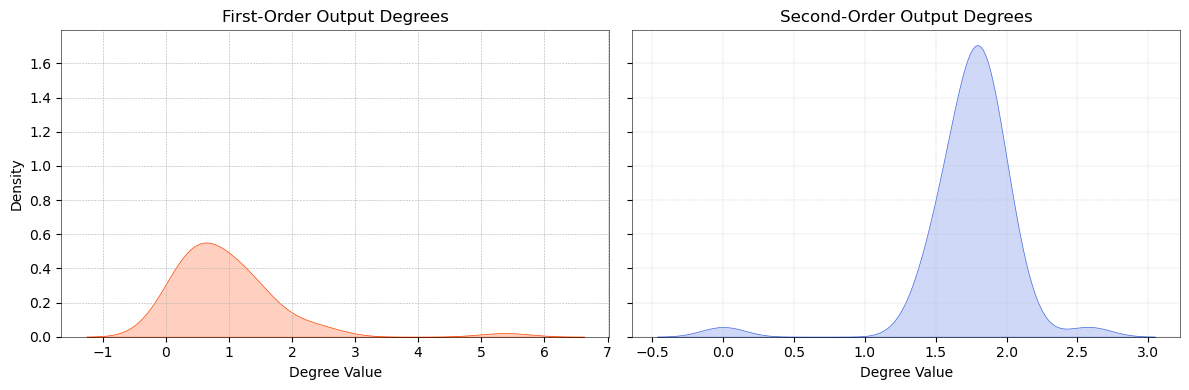

In [163]:
plot_output_degrees_density(degrees['First-Order Degree'], degrees['Second-Order Degree'])

In [114]:
# check which sectors are in the tails, i.e top sectors regarding the degree values
degrees['First-Order Degree'].sort_values(ascending=False).head(10)

G         5.373919
K         2.495340
N         2.351865
M         2.157035
F         1.671535
L         1.663422
C10T12    1.473437
B09       1.455875
H49       1.440366
C24       1.368717
Name: First-Order Degree, dtype: float64

In [119]:
degrees['Second-Order Degree'].sort_values(ascending=False).head(5)

C13T15    2.580962
K         2.093827
H53       2.022127
C22       1.996477
A01_02    1.986465
Name: Second-Order Degree, dtype: float64

### **Step 3 - ECCDF for output degrees**

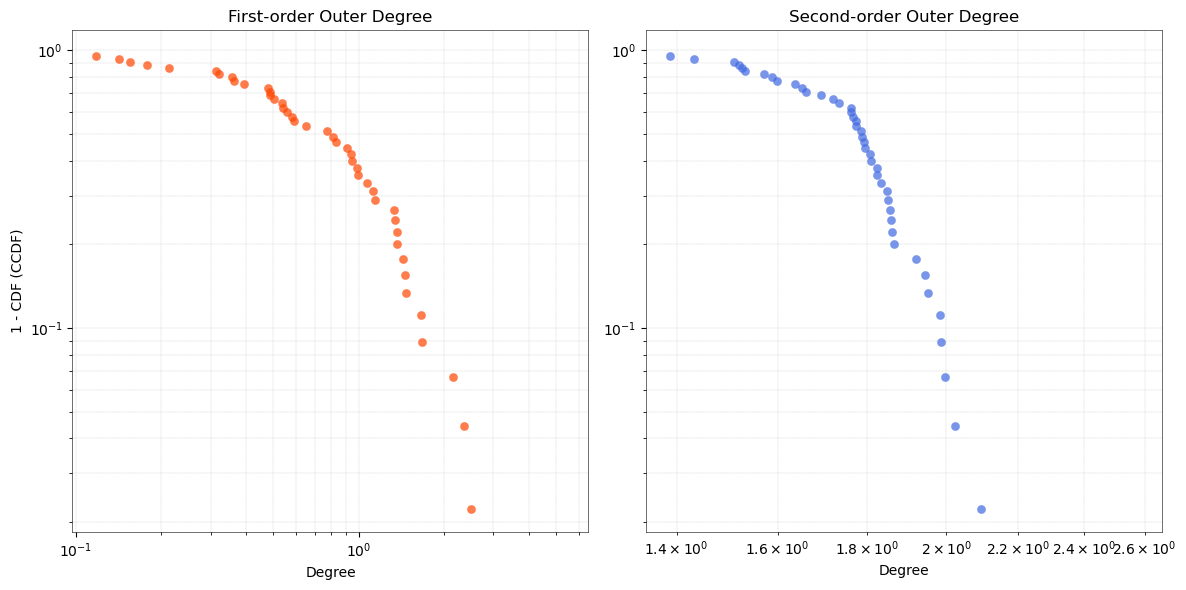

In [154]:
def compute_ccdf_direct(data):
    # Unique sorted values (ascending)
    values = np.sort(np.unique(data))
    n = len(data)

    # For each unique value, count how many data points are greater than it
    ccdf_y = np.array([np.sum(data > v) / n for v in values])

    return values, ccdf_y

# Compute CCDFs
x1, y1 = compute_ccdf_direct(degrees['First-Order Degree'])
x2, y2 = compute_ccdf_direct(degrees['Second-Order Degree'])

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First-order outer degree
axs[0].loglog(x1, y1, marker='o', linestyle='none', alpha=0.7, color='orangered', mew=0.2)
axs[0].set_title('First-order Outer Degree')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('1 - CDF (CCDF)')
axs[0].grid(True, which="both", ls="--", linewidth=0.2)

# Second-order outer degree
axs[1].loglog(x2, y2, marker='o', linestyle='none', alpha=0.7, color='royalblue', mew=0.2)
axs[1].set_title('Second-order Outer Degree')
axs[1].set_xlabel('Degree')
#axs[1].set_ylabel('1 - CDF (CCDF)')
axs[1].grid(True, which="both", ls="--", linewidth=0.2)

plt.tight_layout()
plt.show()

### **Step 4 - power law parameters estimation**

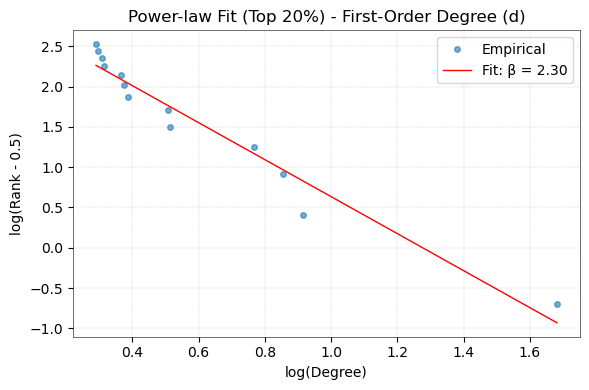

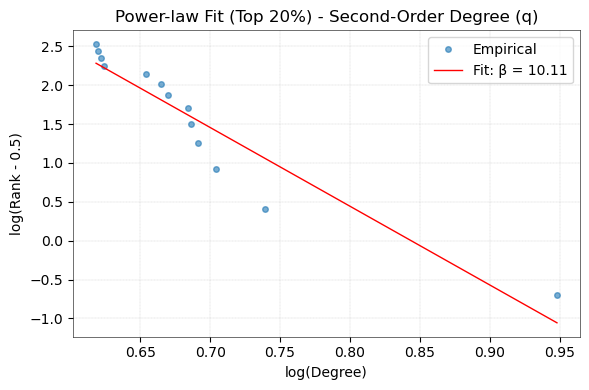

Estimated β (first-order degree): 2.297, R² = 0.955
Estimated ζ (second-order degree): 10.115, R² = 0.893


In [156]:
import statsmodels.api as sm

# Function to estimate power-law using Gabaix–Ibragimov correction
def estimate_power_law_gabaix(values, label=''):
    # Drop zeros and sort descending
    values = values[values > 0].sort_values(ascending=False)
    n = len(values)
    ranks = np.arange(1, n + 1)

    # Gabaix–Ibragimov correction: use rank - 0.5
    x = np.log(values.values)
    y = np.log(ranks - 0.5)

    # Run OLS: y = α - β x
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    beta = -model.params[1]
    
    # Plot log-log CCDF
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, 'o', markersize=4, alpha=0.6, label='Empirical')
    plt.plot(x, model.predict(X), 'r-', label=f'Fit: β = {beta:.2f}', linewidth=1.)
    plt.title(f'Power-law Fit (Top 20%) - {label}')
    plt.xlabel('log(Degree)')
    plt.ylabel('log(Rank - 0.5)')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.2)
    plt.tight_layout()
    plt.show()

    return beta, model.rsquared

# === 7. Take top 20% of d and q
top_d = degrees['First-Order Degree'].nlargest(int(0.30 * len(degrees)))
top_q = degrees['Second-Order Degree'].nlargest(int(0.30 * len(degrees)))

# === 8. Estimate and plot
beta_d, r2_d = estimate_power_law_gabaix(top_d, label='First-Order Degree (d)')
beta_q, r2_q = estimate_power_law_gabaix(top_q, label='Second-Order Degree (q)')

# === 9. Output results
print(f'Estimated β (first-order degree): {beta_d:.3f}, R² = {r2_d:.3f}')
print(f'Estimated ζ (second-order degree): {beta_q:.3f}, R² = {r2_q:.3f}')

other estimation, basic regression (less relaiable)

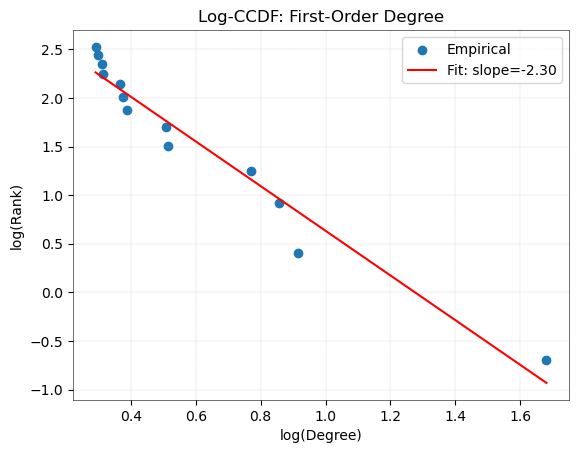

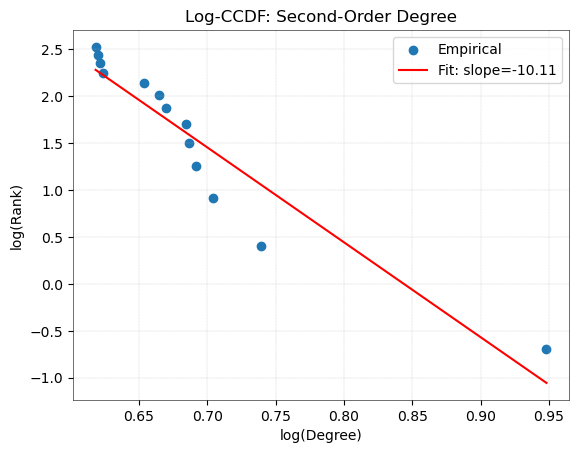

Estimated β (first-order degree exponent): 2.297, R² = 0.955
Estimated ζ (second-order degree exponent): 10.115, R² = 0.893


In [159]:
# === Plot CCDF (log-log) for top 20% of d and q ===
def plot_ccdf_loglog(values, title):
    sorted_vals = np.sort(values)[::-1]
    n_tail = int(len(sorted_vals))
    x = np.log(sorted_vals[:n_tail])
    y = np.log(np.arange(1, n_tail + 1) - 0.5)

    plt.figure()
    plt.scatter(x, y, label="Empirical")
    slope, intercept, rvalue, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, label=f"Fit: slope={slope:.2f}", color='red')
    plt.title(f"Log-CCDF: {title}")
    plt.xlabel("log(Degree)")
    plt.ylabel("log(Rank)")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.2)
    plt.show()

    # Adjusted estimate per Gabaix and Ibragimov (2011)
    #beta_hat = 1 + (-slope)

    beta_hat = -slope
    return beta_hat, rvalue**2

# === Estimate power-law exponent for first- and second-order degrees ===
beta, rvalue1 = plot_ccdf_loglog(top_d, "First-Order Degree")
zeta, rvalue2 = plot_ccdf_loglog(top_q, "Second-Order Degree")

print(f"Estimated β (first-order degree exponent): {beta:.3f}, R² = {rvalue1:.3f}")
print(f"Estimated ζ (second-order degree exponent): {zeta:.3f}, R² = {rvalue2:.3f}")

### **Step 6 - final consideration about decay of aggregate volatility**

In [64]:
CV = (1/np.mean(degrees['First-Order Degree']))*np.var(degrees['First-Order Degree'], ddof=1)
CV

np.float64(0.8326089053313124)

In [87]:
print(f"so we have that aggregate volatility decays no faster than n^{(1+CV)/np.sqrt(n)}")

so we have that aggregate volatility decays no faster than n^0.2731892058994861
